In [1585]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
import random
import statsmodels.api as sm
from sklearn import preprocessing
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn import linear_model
from math import sqrt
from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import cov
from sklearn.tree import DecisionTreeRegressor



In [1586]:
pwd

'/Users/saurabhsingh/Desktop/employee_absenteeism'

In [1587]:
os.chdir('/Users/saurabhsingh/desktop/employee_absenteeism')

In [1588]:
pwd

'/Users/saurabhsingh/Desktop/employee_absenteeism'

In [1589]:
EA=pd.read_excel('Absenteeism_at_work_Project.xls')

/anaconda3/lib/python3.7/site-packages/xlrd/book.py:74: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  t0 = time.clock()
/anaconda3/lib/python3.7/site-packages/xlrd/book.py:89: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  t1 = time.clock()
/anaconda3/lib/python3.7/site-packages/xlrd/book.py:130: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  t2 = time.clock()


In [1590]:
EA.shape

(740, 21)

In [1591]:
EA.describe

<bound method NDFrame.describe of      ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11           26.000000          7.000000                3        1   
1    36            0.000000          7.000000                3        1   
2     3           23.000000          7.000000                4        1   
3     7            7.000000          7.000000                5        1   
4    11           23.000000          7.000000                5        1   
5     3           23.000000          7.000000                6        1   
6    10           22.000000          7.000000                6        1   
7    20           23.000000          7.000000                6        1   
8    14           19.000000          7.000000                2        1   
9     1           22.000000          7.000000                2        1   
10   20            1.000000          7.000000                2        1   
11   20            1.000000          7.000000                3    

In [1592]:
EA.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.000000,7.000000,3,1,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,4.000000
1,36,0.000000,7.000000,3,1,118.000000,13.000000,18.000000,50.000000,239554.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,98.000000,178.000000,31.000000,0.000000
2,3,23.000000,7.000000,4,1,179.000000,51.000000,18.000000,38.000000,239554.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,89.000000,170.000000,31.000000,2.000000
3,7,7.000000,7.000000,5,1,279.000000,5.000000,14.000000,39.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,68.000000,168.000000,24.000000,4.000000
4,11,23.000000,7.000000,5,1,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,2.000000


In [1593]:
pd.set_option('display.float_format', lambda x:'%f'%x)

# Missing value analysis

In [1594]:
missing_val=pd.DataFrame(EA.isnull().sum())

In [1595]:
 missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [1596]:
missing_val = missing_val.reset_index()

In [1597]:
missing_val

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [1598]:
missing_val = missing_val.rename(columns = {'index':'variables',0:'Missing_Percentage'})

In [1599]:
missing_val

,variables,Missing_Percentage
0,ID,0
1,Reason for absence,3
2,Month of absence,1
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [1600]:
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(EA))*100

In [1601]:
missing_val

,variables,Missing_Percentage
0,ID,0.000000
1,Reason for absence,0.405405
2,Month of absence,0.135135
3,Day of the week,0.000000
4,Seasons,0.000000
5,Transportation expense,0.945946
6,Distance from Residence to Work,0.405405
7,Service time,0.405405
8,Age,0.405405
9,Work load Average/day,1.351351


In [1602]:
missing_val.sort_values('Missing_Percentage',inplace=True,ascending=False)

In [1603]:
missing_val

,variables,Missing_Percentage
19,Body mass index,4.189189
20,Absenteeism time in hours,2.972973
18,Height,1.891892
9,Work load Average/day,1.351351
12,Education,1.351351
5,Transportation expense,0.945946
13,Son,0.810811
11,Disciplinary failure,0.810811
10,Hit target,0.810811
15,Social smoker,0.540541


Replacing present value with NA and checking with mean/median/KNN then using the best imputation method

In [1604]:
EA['Transportation expense'].loc[51]

225.0

Actual value=225.00


 Median=225.00
 
 
 Mean=221.03
 
 
 KNN=276.85

In [1605]:
EA['Transportation expense'].loc[51]=np.nan

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1606]:
#EA['Transportation expense']=EA['Transportation expense'].fillna(EA['Transportation expense'].median())
#EA['Transportation expense'].loc[51]

In [1607]:
#EA['Transportation expense']=EA['Transportation expense'].fillna(EA['Transportation expense'].mean())
#EA['Transportation expense'].loc[51]

In [1608]:
#from fancyimpute import KNN
#EA = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = EA.columns)

Imputing all categorial variables with mode and continuous variable with median

In [1609]:
EA['Education'] = EA['Education'].fillna(EA['Education'].median())
EA['Disciplinary failure']=EA['Disciplinary failure'].fillna(EA['Disciplinary failure'].median())
EA['Hit target']=EA['Hit target'].fillna(EA['Hit target'].median())
EA['Social smoker']=EA['Social smoker'].fillna(EA['Social smoker'].median())
EA['Reason for absence']=EA['Reason for absence'].fillna(EA['Reason for absence'].median())
EA['Social drinker']=EA['Social drinker'].fillna(EA['Social drinker'].median())
EA['Pet']=EA['Pet'].fillna(EA['Pet'].median())
EA['Month of absence']=EA['Month of absence'].fillna(EA['Month of absence'].median())
EA['Son']=EA['Son'].fillna(EA['Son'].median())

In [1610]:
EA['Body mass index']=EA['Body mass index'].fillna(EA['Body mass index'].median())
EA['Absenteeism time in hours']=EA['Absenteeism time in hours'].fillna(EA['Absenteeism time in hours'].median())
EA['Height'] = EA['Height'].fillna(EA['Height'].median())

EA['Work load Average/day '] = EA['Work load Average/day '].fillna(EA['Work load Average/day '].median())
EA['Transportation expense'] = EA['Transportation expense'].fillna(EA['Transportation expense'].median())
                                                                   
EA['Age'] = EA['Age'].fillna(EA['Age'].median())
EA['Service time']=EA['Service time'].fillna(EA['Service time'].median())

EA['Weight'] = EA['Weight'].fillna(EA['Weight'].mean())
EA['Distance from Residence to Work']=EA['Distance from Residence to Work'].fillna(EA['Distance from Residence to Work'].median())

                                                                   

In [1611]:
EA.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [1612]:
EA.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.000000,7.000000,3,1,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,4.000000
1,36,0.000000,7.000000,3,1,118.000000,13.000000,18.000000,50.000000,239554.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,98.000000,178.000000,31.000000,0.000000
2,3,23.000000,7.000000,4,1,179.000000,51.000000,18.000000,38.000000,239554.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,89.000000,170.000000,31.000000,2.000000
3,7,7.000000,7.000000,5,1,279.000000,5.000000,14.000000,39.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,68.000000,168.000000,24.000000,4.000000
4,11,23.000000,7.000000,5,1,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,2.000000


In [1613]:
EA['ID'] = EA['ID'].astype('category')
EA['Reason for absence'] = EA['Reason for absence'].astype('category')
EA['Month of absence'] = EA['Month of absence'].astype('category')
EA['Day of the week'] = EA['Day of the week'].astype('category')
EA['Seasons'] = EA['Seasons'].astype('category')
EA['Disciplinary failure'] = EA['Disciplinary failure'].astype('category')
EA['Education'] = EA['Education'].astype('category')
EA['Social drinker'] = EA['Social drinker'].astype('category')
EA['Social smoker'] = EA['Social smoker'].astype('category')


In [1614]:
#numeric = EA[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target',
    #'Son', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']]


In [1615]:
numeric.shape

(740, 12)

In [1616]:
#factor = EA[['ID', 'Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
 #   'Social smoker']]
#factor.shape

# Outlier analysis

In [1617]:
get_ipython().run_line_magic('matplotlib', 'inline')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4297c3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c428036d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4282b710>],
 'medians': [<matplotlib.lines.Line2D at 0x1c428032e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42a8c080>],
 'means': []}

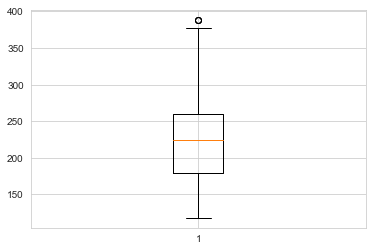

In [1618]:
plt.boxplot(EA['Transportation expense'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1c4272af98>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42856ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4272ab70>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42722198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42722d68>],
 'means': []}

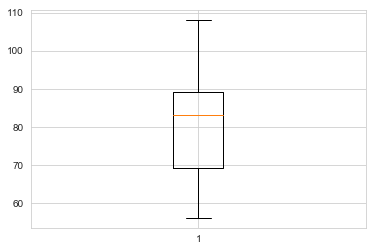

In [1619]:
plt.boxplot(EA['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c41176160>,
 'caps': [<matplotlib.lines.Line2D at 0x1c411767b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c40f33780>],
 'medians': [<matplotlib.lines.Line2D at 0x1c41165ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c41165400>],
 'means': []}

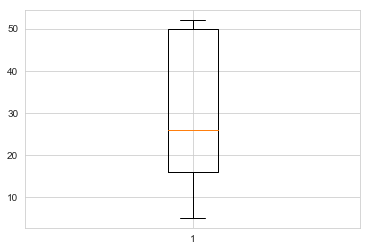

In [1620]:
plt.boxplot(EA['Distance from Residence to Work'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c41e4f8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3f36fef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c41e14dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c41223a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c3f2e1588>],
 'means': []}

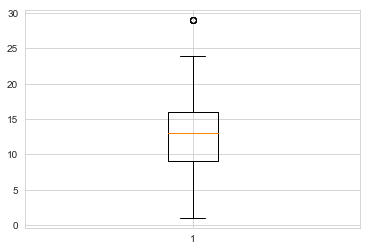

In [1621]:
plt.boxplot(EA['Service time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3f3b4f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1c40868630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4123f780>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42708a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c427085f8>],
 'means': []}

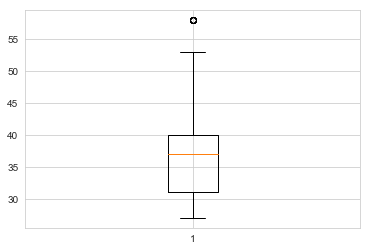

In [1622]:
plt.boxplot(EA['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c42873d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4285da20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c42873ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4285df60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4285f780>],
 'means': []}

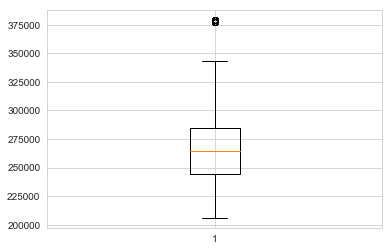

In [1623]:

plt.boxplot(EA['Work load Average/day '])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c43b04470>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43b04d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43af1eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43b0e630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43b0ea90>],
 'means': []}

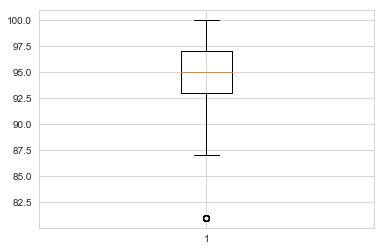

In [1624]:
plt.boxplot(EA['Hit target'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1c41160860>,
 'caps': [<matplotlib.lines.Line2D at 0x1c41160da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c411602e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4117aa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4117ae80>],
 'means': []}

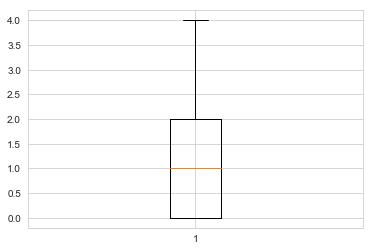

In [1625]:
plt.boxplot(EA['Son'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c43aa1fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43a6d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43aa1a58>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43a6de10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43a8e630>],
 'means': []}

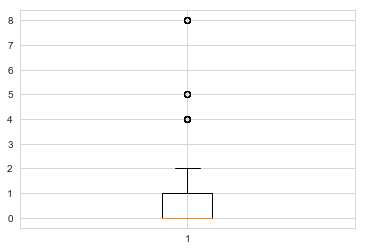

In [1626]:
plt.boxplot(EA['Pet'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1c43ae8cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42bda9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43ae8b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42bdaef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42be2710>],
 'means': []}

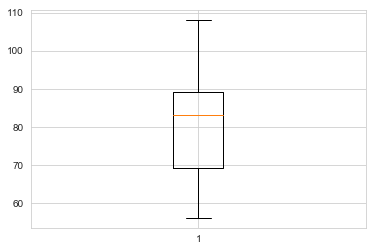

In [1627]:
plt.boxplot(EA['Weight'])



{'whiskers': [<matplotlib.lines.Line2D at 0x1c43c8ab00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43c8f400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43c8a588>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43c8fcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43c8fda0>],
 'means': []}

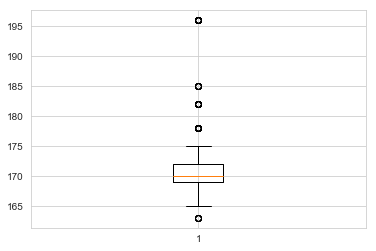

In [1628]:
plt.boxplot(EA['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c43ce5828>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43ce5d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43ce52b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43ced9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43cede48>],
 'means': []}

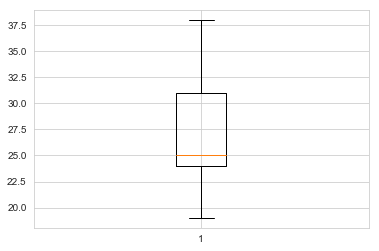

In [1629]:
plt.boxplot(EA['Body mass index'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c43df8e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1c43e00780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c43df8908>],
 'medians': [<matplotlib.lines.Line2D at 0x1c43e00cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c43e0a4e0>],
 'means': []}

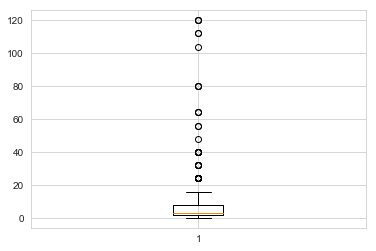

In [1630]:

plt.boxplot(EA['Absenteeism time in hours'])

In [1631]:
for i in EA:
    print(i)
    q75,q25 = np.percentile(EA.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)

ID
-19.5
56.5
Reason for absence
-6.5
45.5
Month of absence
-6.0
18.0
Day of the week
0.0
8.0
Seasons
-1.0
7.0
Transportation expense
57.5
381.5
Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
183688.0
345552.0
Hit target
87.0
103.0
Disciplinary failure
0.0
0.0
Education
1.0
1.0
Son
-3.0
5.0
Social drinker
-1.5
2.5
Social smoker
0.0
0.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
13.5
41.5
Absenteeism time in hours
-7.0
17.0


replacing all the outliers of numeric(continuous) variables with NA.

Imputing all the outliers with KNN.

In [1632]:
EA = pd.DataFrame(KNN(k = 3).fit_transform(EA), columns = EA.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.133
Imputing row 101/740 with 0 missing, elapsed time: 0.133
Imputing row 201/740 with 0 missing, elapsed time: 0.134
Imputing row 301/740 with 0 missing, elapsed time: 0.134
Imputing row 401/740 with 0 missing, elapsed time: 0.134
Imputing row 501/740 with 0 missing, elapsed time: 0.134
Imputing row 601/740 with 0 missing, elapsed time: 0.135
Imputing row 701/740 with 0 missing, elapsed time: 0.135


/anaconda3/lib/python3.7/site-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Checking if there is any missing value still left..

In [1633]:
EA.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [1634]:
EA.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.000000,26.000000,7.000000,3.000000,1.000000,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,4.000000
1,36.000000,0.000000,7.000000,3.000000,1.000000,118.000000,13.000000,18.000000,50.000000,239554.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,98.000000,178.000000,31.000000,0.000000
2,3.000000,23.000000,7.000000,4.000000,1.000000,179.000000,51.000000,18.000000,38.000000,239554.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,89.000000,170.000000,31.000000,2.000000
3,7.000000,7.000000,7.000000,5.000000,1.000000,279.000000,5.000000,14.000000,39.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,68.000000,168.000000,24.000000,4.000000
4,11.000000,23.000000,7.000000,5.000000,1.000000,289.000000,36.000000,13.000000,33.000000,239554.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,90.000000,172.000000,30.000000,2.000000


Checking if there any outliers still left..

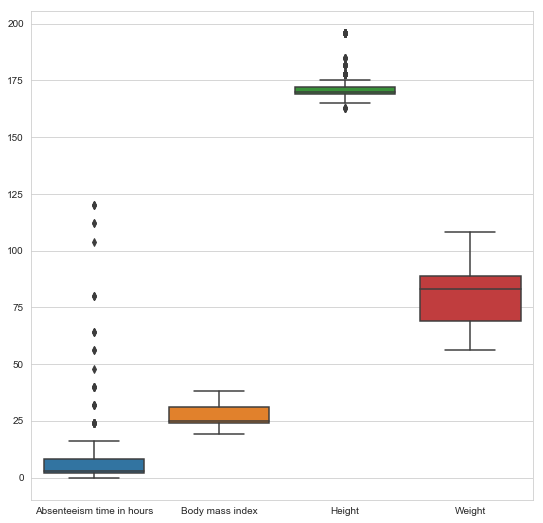

In [1635]:
sns.boxplot(data=EA[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(9,9)

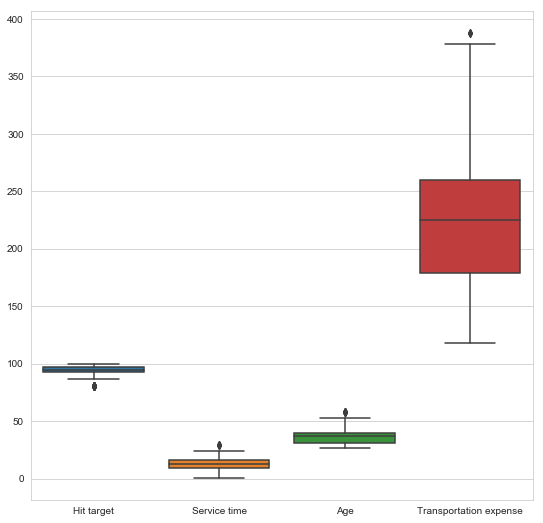

In [1636]:
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(9,9)

# Visualisations 

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update y

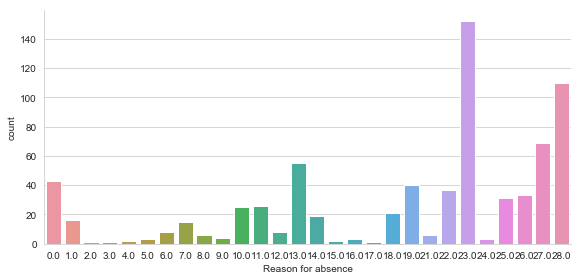

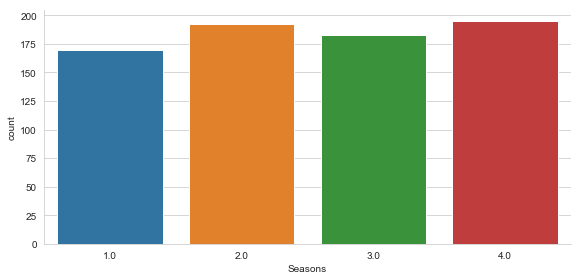

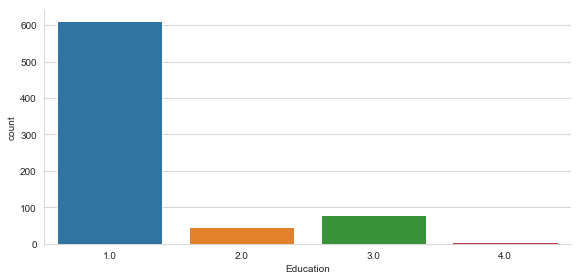

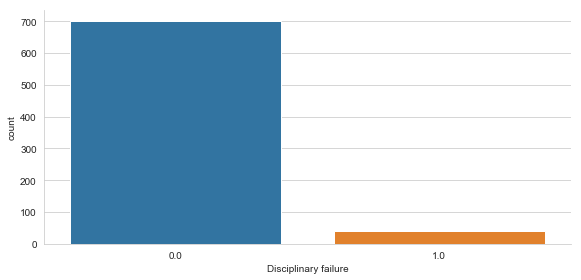

In [1637]:
#Checking the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=EA, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EA, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EA, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=EA, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

Text(0.5,1,'Weight Distribution')

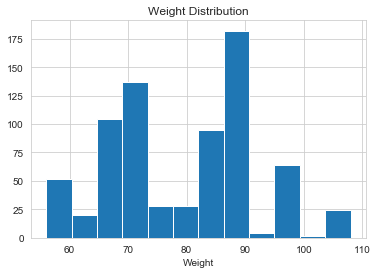

In [1638]:
#Checking the distribution of numerical data using histogram
plt.hist(data=EA, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5,1,'Age Distribution')

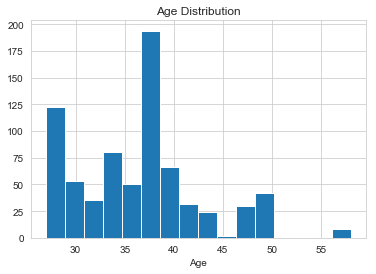

In [1639]:
#Checking the distribution of numerical data using histogram
plt.hist(data=EA, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

In [1640]:
EA['ID'] = EA['ID'].astype('category')
EA['Reason for absence'] = EA['Reason for absence'].astype('category')
EA['Month of absence'] = EA['Month of absence'].astype('category')
EA['Day of the week'] = EA['Day of the week'].astype('category')
EA['Seasons'] =EA['Seasons'].astype('category')
EA['Disciplinary failure'] = EA['Disciplinary failure'].astype('category')
EA['Education'] = EA['Education'].astype('category')
EA['Social drinker'] = EA['Social drinker'].astype('category')
EA['Social smoker'] = EA['Social smoker'].astype('category')


# Feature selection

In [1641]:
numeric = EA[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target',
    'Son', 'Pet','Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']]


In [1642]:
factor = EA[['ID', 'Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
    'Social smoker']]

/anaconda3/lib/python3.7/site-packages/seaborn/palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/anaconda3/lib/python3.7/site-packages/seaborn/palettes.py:777: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


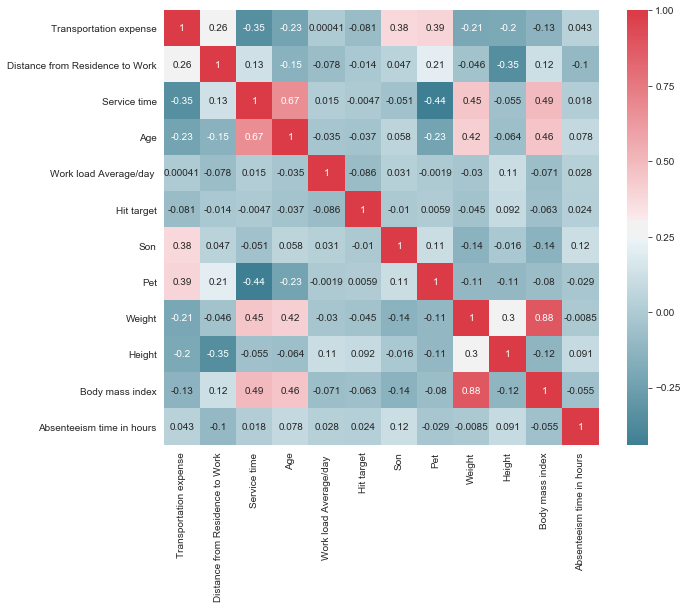

In [1643]:
#Correlation analysis
correlation = numeric.corr()
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation,mask = np.zeros_like(correlation,dtype = np.object),cmap = sns.diverging_palette(220,10,as_cmap = True),square = True, ax=ax,annot = True)


In [1644]:
#ANOVA for categorical variable
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Reason for absence"]))

F_onewayResult(statistic=455.3711473915174, pvalue=2.707113523010777e-88)


In [1645]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Month of absence"]))

F_onewayResult(statistic=1.1472281864806217, pvalue=0.28430500959032)


In [1646]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Day of the week"]))


F_onewayResult(statistic=35.90534534236459, pvalue=2.597843591203105e-09)


In [1647]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Seasons"]))

F_onewayResult(statistic=77.43805808135198, pvalue=3.7436356639463614e-18)


In [1648]:

print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Social smoker"]))


F_onewayResult(statistic=192.82867048087573, pvalue=2.6693616173845234e-41)


In [1649]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Social drinker"]))


F_onewayResult(statistic=165.5086864619558, pvalue=5.582372789491098e-36)


In [1650]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Disciplinary failure"]))




F_onewayResult(statistic=194.00177378775473, pvalue=1.5848851694285747e-41)


In [1651]:
print(stats.f_oneway(EA["Absenteeism time in hours"],EA["Education"]))

F_onewayResult(statistic=129.49899329227654, pvalue=8.030025614992404e-29)


In [1652]:
df=EA.copy()

In [1653]:
#Dropping variables which doesn't explain target variables
del EA['ID']
del EA['Seasons']
del EA['Education']
del EA['Month of absence']
del EA['Hit target']
del EA['Pet']
del EA['Body mass index']
del EA['Disciplinary failure']
del EA['Age']
del EA['Social smoker']
del EA['Social drinker']
del EA['Son']

In [1654]:
EA

,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Weight,Height,Absenteeism time in hours
0,26.000000,3.000000,289.000000,36.000000,13.000000,239554.000000,90.000000,172.000000,4.000000
1,0.000000,3.000000,118.000000,13.000000,18.000000,239554.000000,98.000000,178.000000,0.000000
2,23.000000,4.000000,179.000000,51.000000,18.000000,239554.000000,89.000000,170.000000,2.000000
3,7.000000,5.000000,279.000000,5.000000,14.000000,239554.000000,68.000000,168.000000,4.000000
4,23.000000,5.000000,289.000000,36.000000,13.000000,239554.000000,90.000000,172.000000,2.000000
5,23.000000,6.000000,179.000000,51.000000,18.000000,239554.000000,89.000000,170.000000,3.000000
6,22.000000,6.000000,225.000000,52.000000,3.000000,239554.000000,80.000000,172.000000,8.000000
7,23.000000,6.000000,260.000000,50.000000,11.000000,239554.000000,65.000000,168.000000,4.000000
8,19.000000,2.000000,155.000000,12.000000,14.000000,239554.000000,95.000000,196.000000,40.000000
9,22.000000,2.000000,235.000000,11.000000,14.000000,239554.000000,88.000000,172.000000,8.000000


# Feature Scaling

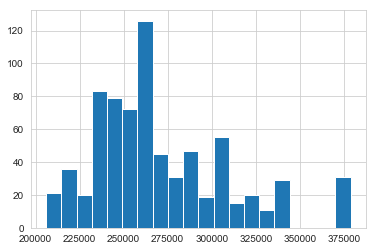

In [1655]:
#Normality check
EA[ 'Work load Average/day '].hist(bins = 20)

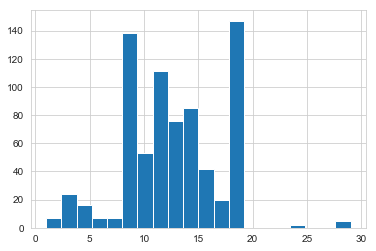

In [1656]:
EA['Service time'].hist(bins = 20)

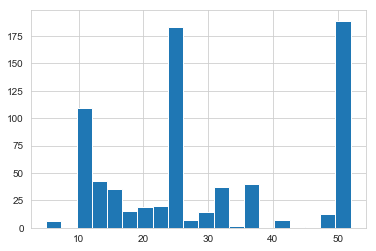

In [1657]:
EA['Distance from Residence to Work'].hist(bins = 20)

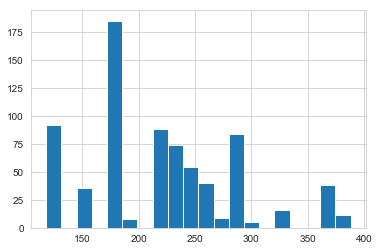

In [1658]:
EA['Transportation expense'].hist(bins = 20)



Data is not normally distributed so we will scale it with normalization



In [1659]:
cnames= df[['Transportation expense','Distance from Residence to Work','Service time','Height']]


In [1660]:
for i in cnames:
    print(i)
    EA[i]=(EA[i]-np.min(EA[i]))/(np.max(EA[i])-np.min(EA[i]))

Transportation expense
Distance from Residence to Work
Service time
Height


In [1661]:
EA

,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Weight,Height,Absenteeism time in hours
0,26.000000,3.000000,0.633333,0.659574,0.428571,239554.000000,90.000000,0.272727,4.000000
1,0.000000,3.000000,0.000000,0.170213,0.607143,239554.000000,98.000000,0.454545,0.000000
2,23.000000,4.000000,0.225926,0.978723,0.607143,239554.000000,89.000000,0.212121,2.000000
3,7.000000,5.000000,0.596296,0.000000,0.464286,239554.000000,68.000000,0.151515,4.000000
4,23.000000,5.000000,0.633333,0.659574,0.428571,239554.000000,90.000000,0.272727,2.000000
5,23.000000,6.000000,0.225926,0.978723,0.607143,239554.000000,89.000000,0.212121,3.000000
6,22.000000,6.000000,0.396296,1.000000,0.071429,239554.000000,80.000000,0.272727,8.000000
7,23.000000,6.000000,0.525926,0.957447,0.357143,239554.000000,65.000000,0.151515,4.000000
8,19.000000,2.000000,0.137037,0.148936,0.464286,239554.000000,95.000000,1.000000,40.000000
9,22.000000,2.000000,0.433333,0.127660,0.464286,239554.000000,88.000000,0.272727,8.000000


# Machine learning algorithm

In [1662]:
## dividing data into train and test
train,test = train_test_split(EA,test_size= 0.2)

In [1663]:
# Decision Tree Regression
random.seed(123)
fit = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:8],train.iloc[:,8])


In [1664]:
predictions_dt = fit.predict(test.iloc[:,0:8])

In [1665]:
mse_dt = (mean_squared_error(test.iloc[:,8], predictions_dt))
print(mse_dt)

143.70080981840226


In [1666]:
rmse_dt = sqrt(mean_squared_error(test.iloc[:,8],predictions_dt))
print(rmse_dt)


11.987527260382029


In [1667]:
# Random forest
# n = 100
random.seed(123)
rfregressor100 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfregressor100.fit(train.iloc[:,0:8],train.iloc[:,8])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1668]:

predictions_rf100 = rfregressor100.predict(test.iloc[:,0:8])


In [1669]:
mse_rf100 = (mean_squared_error(test.iloc[:,8], predictions_rf100))
print(mse_rf100)

189.03586443326958


In [1670]:
rmse_rf100 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf100))
print(rmse_rf100)


13.74903139982121


In [1671]:

# Random forest for n = 200
random.seed(123)
rfregressor200 = RandomForestRegressor(n_estimators = 200, random_state = 0)
rfregressor200.fit(train.iloc[:,0:8],train.iloc[:,8])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1672]:
predictions_rf200 = rfregressor200.predict(test.iloc[:,0:8])

In [1673]:
mse_rf200 = (mean_squared_error(test.iloc[:,8], predictions_rf200))
print(mse_rf200)


185.75626671245777


In [1674]:
rmse_rf200 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf200))
print(rmse_rf200)

13.629243071882524


In [1675]:

# Random forest for n = 300

rfregressor300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
rfregressor300.fit(train.iloc[:,0:8],train.iloc[:,8])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1676]:
predictions_rf300 = rfregressor300.predict(test.iloc[:,0:8])

In [1677]:
mse_rf300 = (mean_squared_error(test.iloc[:,8], predictions_rf300))
print(mse_rf300)

185.67035886650672


In [1678]:
rmse_rf300 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf300))
print(rmse_rf300)

13.626091107375832


In [1679]:
rfregressor500 = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfregressor500.fit(train.iloc[:,0:8],train.iloc[:,8])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1680]:
predictions_rf500 = rfregressor500.predict(test.iloc[:,0:8])


In [1681]:
mse_rf500 = (mean_squared_error(test.iloc[:,8], predictions_rf500))
print(mse_rf500)

187.59394106993432


In [1682]:
rmse_rf500 = sqrt(mean_squared_error(test.iloc[:,8],predictions_rf500))
print(rmse_rf500)

13.69649375095445


In [1683]:
# Linear regression 

EA['Reason for absence'] = EA['Reason for absence'].astype('float')
EA['Day of the week'] = EA['Day of the week'].astype('float')



In [1684]:
train1,test1 = train_test_split(EA,test_size = 0.2)

In [1685]:
line_regression = sm.OLS(train1.iloc[:,8],train1.iloc[:,0:8]).fit()

In [1686]:
predictions_lr = line_regression.predict(test1.iloc[:,0:8])


In [1687]:
mse_lr = (mean_squared_error(test.iloc[:,8], predictions_lr))
print(mse_lr)

142.1964823524165


In [1688]:
rmse_linear = sqrt(mean_squared_error(test1.iloc[:,8],predictions_lr))
print(rmse_linear)

11.214252205269306


In [1689]:
loss = df[['Month of absence','Service time','Work load Average/day ','Absenteeism time in hours']]


In [1690]:
# Work loss = (Workload*Absenteeism time)/Service time

loss["loss_month"] = (loss['Work load Average/day ']*loss['Absenteeism time in hours'])/loss['Service time']



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1691]:
loss.shape

(740, 5)

In [1692]:
loss.head(5)

,Month of absence,Service time,Work load Average/day,Absenteeism time in hours,loss_month
0,7.000000,13.000000,239554.000000,4.000000,73708.923077
1,7.000000,18.000000,239554.000000,0.000000,0.000000
2,7.000000,18.000000,239554.000000,2.000000,26617.111111
3,7.000000,14.000000,239554.000000,4.000000,68444.000000
4,7.000000,13.000000,239554.000000,2.000000,36854.461538


In [1693]:
loss["loss_month"] = np.round(loss["loss_month"]).astype('int64')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1694]:
No_absent = loss[loss['Month of absence'] == 0]['loss_month'].sum()
January = loss[loss['Month of absence'] == 1]['loss_month'].sum()
February = loss[loss['Month of absence'] == 2]['loss_month'].sum()
March = loss[loss['Month of absence'] == 3]['loss_month'].sum()
April = loss[loss['Month of absence'] == 4]['loss_month'].sum()
May = loss[loss['Month of absence'] == 5]['loss_month'].sum()
June = loss[loss['Month of absence'] == 6]['loss_month'].sum()
July = loss[loss['Month of absence'] == 7]['loss_month'].sum()
August = loss[loss['Month of absence'] == 8]['loss_month'].sum()
September = loss[loss['Month of absence'] == 9]['loss_month'].sum()
October = loss[loss['Month of absence'] == 10]['loss_month'].sum()
November = loss[loss['Month of absence'] == 11]['loss_month'].sum()
December = loss[loss['Month of absence'] == 12]['loss_month'].sum()


In [1695]:
data1 = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}


In [1696]:
workloss = pd.DataFrame.from_dict(data1,orient = 'index')


In [1697]:
workloss.rename(index = str, columns={0:"Workload loss pr month"})


,Workload loss pr month
No Absent,0
Janaury,6312633
Febraury,8268542
March,16070856
April,10999489
May,9693973
June,14475276
July,19100225
August,9059830
September,6658572
